In [1]:
from functions import *

In [2]:
phase_diagrams = {}
q = {}
q_avg = {}

for n in range(5,8):
    phase_diagrams[n] = load_from_json(f'data/phase_diagram_n{n}.json')
    q[n] = phase_diagrams[n]['q']
    q_avg[n] = phase_diagrams[n]['q_avg']

gamma_range = phase_diagrams[7]['gamma_range']
T_range = phase_diagrams[7]['T_range']
num_random_models = phase_diagrams[7]['num_random_models']

# Define a custom palette

In [18]:
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the custom colormap
colors = [
          (1.0, 1.0, 1.0),  # white
          (1.0, 1.0, 1.0), #'#f0d3d3',  # light grey
          dark_grey]  # red (default color of coolwarm colormap)

# Create a custom colormap
cmap_name = 'cmap='coolwarm''
cmap='coolwarm' = LinearSegmentedColormap.from_list(cmap_name, colors)

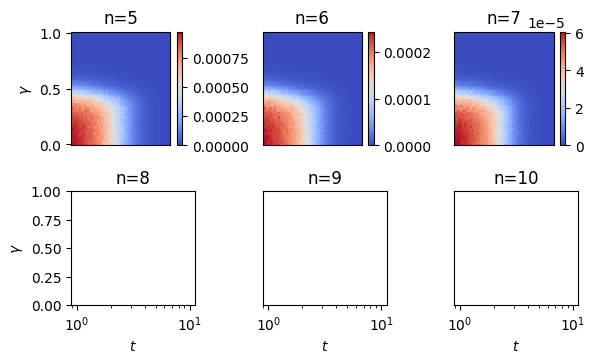

In [22]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(figure_size_x, figure_size_y))

# Plot data on each subplot

pc00 = axs[0, 0].pcolor(T_range, 
                        gamma_range,
                        q_avg[5], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[5])
                        # vmax=0.065,
                        )
pc01 = axs[0, 1].pcolor(T_range, 
                        gamma_range,
                        q_avg[6], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[6])
                        # vmax=0.065,
                        )
pc02 = axs[0, 2].pcolor(T_range, 
                        gamma_range,
                        q_avg[7], 
                        cmap='coolwarm',
                        vmin=0,
                        vmax=np.max(q_avg[7])
                        # vmax=0.065,
                        )
# pc10 = axs[1, 0].pcolor(T_range, 
#                         gamma_range,
#                         q_avg[8], 
#                         cmap='coolwarm',
#                         vmin=0,
#                         vmax=np.max(q_avg[8])
#                         # vmax=0.04,
#                         )
# pc11 = axs[1, 1].pcolor(T_range, 
#                         gamma_range,
#                         q_avg[9], 
#                         cmap='coolwarm',
#                         vmin=0,
#                         vmax=np.max(q_avg[9])
#                         # vmax=0.04,
#                         )
# pc12 = axs[1, 2].pcolor(T_range, 
#                         gamma_range,
#                         q_avg[10], 
#                         cmap='coolwarm',
#                         vmin=0,
#                         vmax=np.max(q_avg[10]),
#                         # vmax=0.04,
#                         )
fig.colorbar(pc00)
fig.colorbar(pc01)
fig.colorbar(pc02)
# fig.colorbar(pc10)
# fig.colorbar(pc11)
# fig.colorbar(pc12)

# Set log scale
axs[0, 0].set_xscale('log')
axs[0, 1].set_xscale('log')
axs[0, 2].set_xscale('log')
axs[1, 0].set_xscale('log')
axs[1, 1].set_xscale('log')
axs[1, 2].set_xscale('log')

# Set labels
axs[1, 0].set_xlabel('$t$')
axs[1, 1].set_xlabel('$t$')
axs[1, 2].set_xlabel('$t$')

axs[0, 0].set_ylabel('$\gamma$')
axs[1, 0].set_ylabel('$\gamma$')

# Set ticks to []
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])

axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])

axs[0, 0].set_title('n=5')
axs[0, 1].set_title('n=6')
axs[0, 2].set_title('n=7')
axs[1, 0].set_title('n=8')
axs[1, 1].set_title('n=9')
axs[1, 2].set_title('n=10')


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

fig.savefig(f'figures/phase_diagram_n5_10')

In [ ]:
# fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

# # Plot data on each subplot

# pc = plt.pcolor(time_range, 
#                 gamma_range,
#                 delta_quantum_arrays[10], 
#                 cmap=grey_red_coolwarm,
#                 vmin=0,
#                 vmax=np.max(delta_quantum_arrays[10])
#                 # vmax=0.065,
#                 )

# fig.colorbar(pc)


# # Set labels
# plt.xlabel('$t$')
# plt.ylabel('$\gamma$')

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Display the plot
# plt.show()

# fig.savefig(f'figures/grid_search_gamma_time_n10')